In [322]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from pathlib import Path
import pandas as pd

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [354]:
INF = 999999

def plot_explored(f, steps=-1, box=INF):
    explored = pd.read_csv(f, delimiter=',', dtype=None)
    display(explored.tail)
    total_explored = len(explored.index)
 
    if steps == -1:
        max_steps = len(explored)
    else:
        explored = explored[:steps]  # prefix
        max_steps = steps
    
    if box == INF:
        n, m = max(explored[:,0]) + 1, max(explored[:,1]) + 1
    else:
        n, m = box, box
    
    img = np.ones((n, m, 4))
    img.fill(0.97)  # grey
    
    #for cnt,(i,j) in enumerate(explored):
    for index, row in explored.iterrows():
        i, j, t, step = row['i'], row['j'], row['type'], row['step']
        if max(i,j) >= box:
            continue
        if t == 'Path':
            img[i,j] = mcolors.to_rgba('xkcd:rust brown')
        elif t == 'Match':
            print(i,j)
            img[i,j] = mcolors.to_rgba('red')
        elif t == 'Explored':
            val = step / max_steps
            if val <= 1.0:
                img[i,j] = cm.cool(val)
    
    fig, ax = plt.subplots()
    title = f.stem
    ax.set_title('{} ({})'.format(title, total_explored), y=-0.01)
    ax.xaxis.tick_top()
    ax.grid(False)
    
    ax.imshow(img)
    fig.savefig('imgs/'+title+'.png')

<bound method NDFrame.tail of            i     j      type  step
0          0     0  Explored   0.0
1          0     1  Explored   1.0
2          1     0  Explored   2.0
3          1     1  Explored   3.0
4          1     2  Explored   4.0
...      ...   ...       ...   ...
140290  1996  2015      Path   NaN
140291  1997  2016      Path   NaN
140292  1998  2017      Path   NaN
140293  1999  2018      Path   NaN
140294  2000  2019      Path   NaN

[140295 rows x 4 columns]>

Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
E

<bound method NDFrame.tail of           i     j      type  step
0         0     0  Explored   0.0
1         0     1  Explored   1.0
2         1     0  Explored   2.0
3         1     1  Explored   3.0
4         1     2  Explored   4.0
...     ...   ...       ...   ...
20324  1956  1975     Match   NaN
20325  1962  1981     Match   NaN
20326  1968  1528     Match   NaN
20327  1980  1998     Match   NaN
20328  1992  1878     Match   NaN

[20329 rows x 4 columns]>

Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
Explored
E

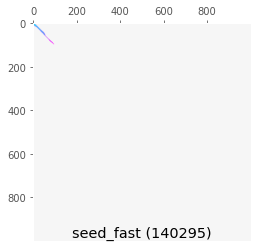

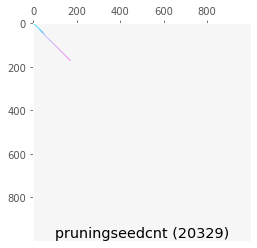

In [355]:
d = Path('stats/')
min_steps = 10000000
all_files = list(d.glob('*.csv'))
some_files = [d/'seed_fast.csv', d/'pruningseedcnt.csv']

files = some_files
for f in files:
    explored = pd.read_csv(f, delimiter=',', dtype=None)
    #display(explored)
    min_steps = min(min_steps, len(explored))
for f in files:
    plot_explored(f, box=1000, steps=700)

In [333]:
def plot_l():
    f = 'stats/table.csv'
    t = pd.read_csv(f, delimiter=',', dtype=None)
    t['algo'] = t.name + ' with ' + t.distance_function
    t['band'] = t.explored / t.len_a
    subt = t.loc[(t.error_rate == 0.1)]
    #display(subt)

    fig, ax = plt.subplots()

    for key, grp in subt.groupby(['algo']):
        ax = grp.plot(ax=ax, kind='line', x='l', y='band', label=key)

    plt.legend(loc='best')
    plt.show()

plot_l()

FileNotFoundError: [Errno 2] No such file or directory: 'stats/table.csv'

,len_a,len_b,error_rate,source,name,distance_function,l,precomputation,astar,expanded,explored,edges,seeds,matches,root_h,path_matches,explored_matches,avg_h,distance,algo,band,delta
16,2000,1997,0.1,Uniform,FastSeed,Zero,4,0.001080,0.050673,92698,96798,271587,500,4268,134,NaN,NaN,94.034350,184,FastSeed with Zero,48.3990,50
17,2000,1997,0.1,Uniform,Seed,Gap,4,0.011516,0.094222,30723,34810,89373,500,4268,161,362.0,418.0,108.909770,184,Seed with Gap,17.4050,23
18,2000,1997,0.1,Uniform,Seed,Count,4,0.020096,0.118177,20106,24184,58755,500,4268,168,364.0,388.0,111.597046,184,Seed with Count,12.0920,16
19,2000,1997,0.1,Uniform,PruningSeed,Count,4,0.020230,1.081734,6165,10252,18285,500,4268,168,364.0,377.0,107.563110,184,PruningSeed with Count,5.1260,16
20,2000,1997,0.1,Uniform,FastSeed,Zero,5,0.000399,0.049838,94467,98588,276660,400,1112,140,NaN,NaN,92.521545,184,FastSeed with Zero,49.2940,44
21,2000,1997,0.1,Uniform,Seed,Gap,5,0.001845,0.078314,35646,39718,103662,400,1112,159,258.0,285.0,104.923004,184,Seed with Gap,19.8590,25
22,2000,1997,0.1,Uniform,Seed,Count,5,0.005009,0.095363,25933,30030,75747,400,1112,167,257.0,269.0,108.750380,184,Seed with Count,15.0150,17
23,2000,1997,0.1,Uniform,PruningSeed,Count,5,0.003132,0.143443,7252,11338,21429,400,1112,167,257.0,263.0,101.991005,184,PruningSeed with Count,5.6690,17
24,2000,1997,0.1,Uniform,FastSeed,Zero,6,0.000152,0.062599,96108,100216,281481,333,366,142,NaN,NaN,93.402000,184,FastSeed with Zero,50.1080,42
25,2000,1997,0.1,Uniform,Seed,Gap,6,0.000473,0.060947,48559,52655,141327,333,366,154,190.0,206.0,102.961310,184,Seed with Gap,26.3275,30


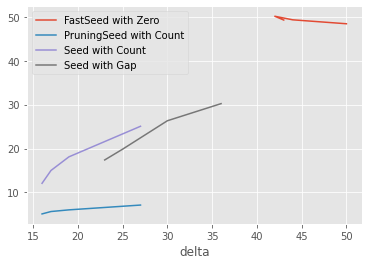

In [321]:
def plot_():
    f = 'stats/table.csv'
    t = pd.read_csv(f, delimiter=',', dtype=None)
    t['algo'] = t.name + ' with ' + t.distance_function
    t['band'] = t.explored / t.len_a
    t['delta'] = t.distance - t.root_h
    
    subt = t.loc[(t.error_rate == 0.1)]
    display(subt)

    fig, ax = plt.subplots()

    for key, grp in subt.groupby(['algo']):
        ax = grp.plot(ax=ax, kind='line', x='delta', y='band', label=key)

    plt.legend(loc='best')
    plt.show()

plot_()